This notebook shows how to plot donut graph. A donut figure is a type of data visualization that resembles a donut or a ring. It is also known as a doughnut chart. This chart is used to display data in a circular format, with the values represented as slices of the donut. The outer ring represents the total value of the data, while the inner ring represents a subset of that total value. The donut figure can be used to compare the proportion of different subsets to the total value, and to show how they relate to each other. It is a useful tool for presenting data in a visually appealing and easy-to-understand way.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def PlotDonut (subsetValues, savePath = None, color = ['#a50026', '#fdae61'], figTitle = 'Donut Figure'):
    
    """
        Plots donut figure. The input to the function can be single list or the list of lists to plot and save the figures automatically. 
        Arguments:
            subsetValues: is a list containing the values for the donut figure.            
            example: subsetValues = [10, 20]            
            savePath: a path containing the image name to save the figure.            
            color: list of colors to fill the parts of donut figure.            
            figTitle: the title of the figure.            
        Returns:
            A donut figure saved in the specified directory.
    """     
    
    assert len(subsetValues) == len(color)   
     
    fig, ax = plt.subplots()
    mpl.rcParams['font.size'] = 10
    mypie,texts = ax.pie(subsetValues, radius=1,pctdistance = 1.4, colors = color)    
    plt.setp(mypie, width=0.5, edgecolor='white')
    ax.set_title(figTitle)
    
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")    
    for i, p in enumerate(mypie):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(str(subsetValues[i]) + '(' + str(np.round(subsetValues[i] / np.sum(subsetValues),2)*100) + '%)',
                    xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y), horizontalalignment=horizontalalignment, **kw)
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    if savePath:
        plt.savefig(savePath, bbox_inches='tight', dpi=500, pad_inches = 0.5)
        plt.close()

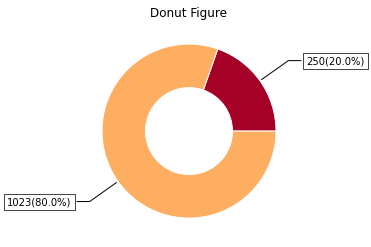

In [5]:
PlotDonut(subsetValues = [250, 1023])